# HeatWaveWinds Analysis

<p>This analysis uses data from WRF regional climate model simulations to understand how wind direction affects the occurance of heat waves. Data a from several realizations of the WRF model using 5 different global climate models as forcing data for WRF:
<p>models = ['mri-cgcm3', 'access1.0', 'access1.3', 'canesm2', 'miroc5']

<p>The wind direction is found from the model results at the 850 hPa level, about 1500m (1 mile) above sea level. Temperatures are the the 2-m air temperature (T2).<p>
The data files in directory Data are in netCDF format. The files contain the average of T2 at each point in the geographical domain over all days and averaged partitioned into 4 categories based on the wind quadrant.
<ul>
<li>T2_all: All days
<li>T2_NE: wind 0 to 90°
<li>T2_SE: wind 90° to 180°
<li>T2_SW: wind 180 to 270°
<li>T2_Nw: wind 270 to 360°
</ul>
<p>This Notebook shows how to read the netCDF and plot the results using the included function WRF_plot.py

First import a bunch of stuff

In [1]:
import xarray as xr
from WRFplot import WRFplot

Read in data for one model

In [2]:
models = ['mri-cgcm3', 'access1.0', 'access1.3', 'canesm2', 'miroc5']
model = models[0] # Change this to the model you want to plot

# read in the data
T2quad_hist = xr.open_dataset(f'Data/T2quad_hist_{model}.nc')
T2quad_fut = xr.open_dataset(f'Data/T2quad_fut_{model}.nc')

Show the variables in this xarray object

In [3]:
print(T2quad_hist.data_vars)

Data variables:
    T2_all   (south_north, west_east) float32 30kB ...
    T2_NE    (south_north, west_east) float32 30kB ...
    T2_SE    (south_north, west_east) float32 30kB ...
    T2_SW    (south_north, west_east) float32 30kB ...
    T2_NW    (south_north, west_east) float32 30kB ...


Create a plot of the difference in average temperature from days when winds are from the NE and all days (called the temperature anomaly for NE winds).

"        \nfilename = 'Test.png'\nplt.tight_layout()\nplt.savefig(filename, dpi=300, bbox_inches='tight')\nplt.close()\nprint(f'Saved figure to {filename}')\n"

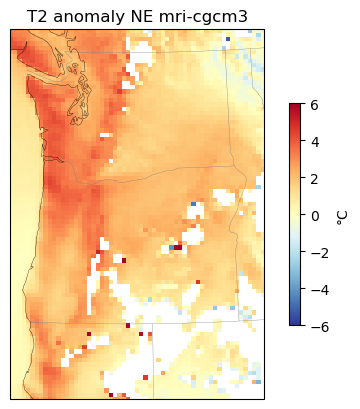

In [4]:
# Select the wind direction quadrant to plot
quadrant = 'NE'  # Options: 'NE', 'SE', 'SW', 'NW'  

# Set geographic range for the map
lat1, lat2 = 40,49.5  # Southern and northern bounds
lon1, lon2 = -124.8,-116.3  # Western and eastern bounds

# Fill arrays for plotting a map
data = T2quad_hist['T2_' + quadrant] - T2quad_hist['T2_all']
lats = T2quad_hist['XLAT']
lons = T2quad_hist['XLONG']

# Temperature anomaly limits
max = 6 # deg-C
min= -max # Symetrical colorscale

WRFplot(
    data,
    lats, lons,
    min,max,
    f'T2 anomaly {quadrant} {model}', '°C', 'RdYlBu_r',
    domain='custom', map_limits=[lon1, lon2, lat1, lat2], # specify the map limits
    smflg=0, # Smooth the data
    subplot=(1, 1, 1), # Position of the subplot in the figure
)

# Uncomment the following lines to save the figure to a file
# This will save the figure as 'Test.png' in the current working directory.
# If you want to save it with a different name or format, change the filename variable.
'''        
filename = 'Test.png'
plt.tight_layout()
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.close()
print(f'Saved figure to {filename}')
'''


<p>To do:
<ol>
<li>Plot a quad map with anomalies for each direction during historic period for all models
<li>Plot a quad map with anomalies for each direction during future period for all models
<li>Plot a quad map with diffence of above for each direction
<li>Add the above for the average over all 5 models
</ol>

<p>This can be either in a  jupyter notebook like this or as a stand-alone python script.